# Final Project Part 2
## Profit Projections - Forecasting in Grocery Stores

### Team

- Ingrid Arreola
- Yash Pandey
- Rahul Palivela


### Dataset 101
This project is using data gathered by Ann Mary Paattarn, this is available via Kaggle as a competition entry. The dataset was released in 2023 and the competition focused on forecast sales for several product categories offered at the grocery stores Corporación Favorita. This dataset has a monthly time interval.

### Description
This notebook contains the following:

1. Time series decomposition 10pts -- Look at HW 2 Q2

- classical_decomposition: Rahul
- additive decomposition: Ingrid


2. Time Series Visualization 10pts (at least 4 plots) -- gg_plot here refers to seasonality

- Autoplot: Ingrid
- GG_Plot Year: Rahul
- GG_Plot Quarter: Yash
- GG_Plot Month: Yash

3. Description of Time series (is it stationary, are there any trends, seasonality etc) 10pts

- Everyone writes a description on their visualization

4. TS models (transformations if needed). Make sure to explain your decision. Compare and select the best model. 50pts --- things from homework (NAIVE, SNAIVE, Random Walk, Moving Average, Drift, ARIMA)

- ARIMA: Ingrid
- SNAIVE & LSTM:Yash
- NAIVE:Rahul

5. Predictions (make some predictions and plot them). 10pts

6. Team contributions. For each team member, describe the contribution. 10pts. Graders reserve the right to apply a different individual grade based on individual contribution.


Ingrid Arreola Contributions:
- Setup Notebooks, Data Exploration for 2 data frames, Question 1: Additive Decomposition, Question 2: Autoplot, Question 3: Autoplot Description, Question 4: ARIMA Model, Question 5: ARIMA Predictions, Asking Group Questions During Office Hours & Communicating to Group, Cleaning up Notebook with Headers and Structure as example for the rest of group  


Yash Pandey Contributions:
- Did the time series vizualization part which includes Quarterly and Monthly time series plot.
- Implemented SNAIVE and LSTM model

Rahul Palivela Contributions:-
- Did the Classical Decomposition and  time series vizualization part which includes Yearly time series plot.
- Implemented NAIVE model


## 0. Load In Data

In [2]:
!pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.3/127.3 kB 13.3 MB/s eta 0:00:00


In [3]:
import plotnine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv('train.csv')

## 1. Time Series Decomposition


In [ ]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
# Formatting the train_df so that we can do the decomp on it
df = pd.melt(train_df, id_vars=['date'], value_vars=['sales', 'onpromotion'],
                    var_name='metric', value_name='value')

# Display the data frame that will be used for decomp
df.head()

,date,metric,value
0,2013-01-01,sales,0.0
1,2013-01-01,sales,0.0
2,2013-01-01,sales,0.0
3,2013-01-01,sales,0.0
4,2013-01-01,sales,0.0


### Additive Decomposition

Using additive decomposition because there are values for zero present in sales in the data frame. Additive is used for time series that has these zero values.

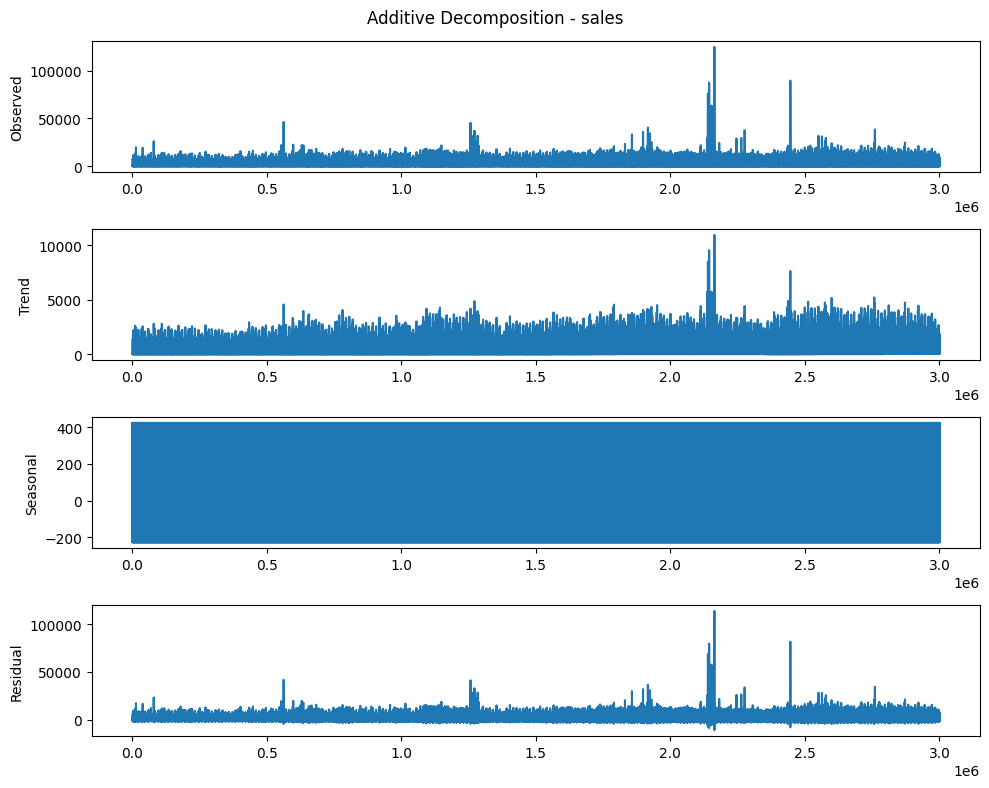

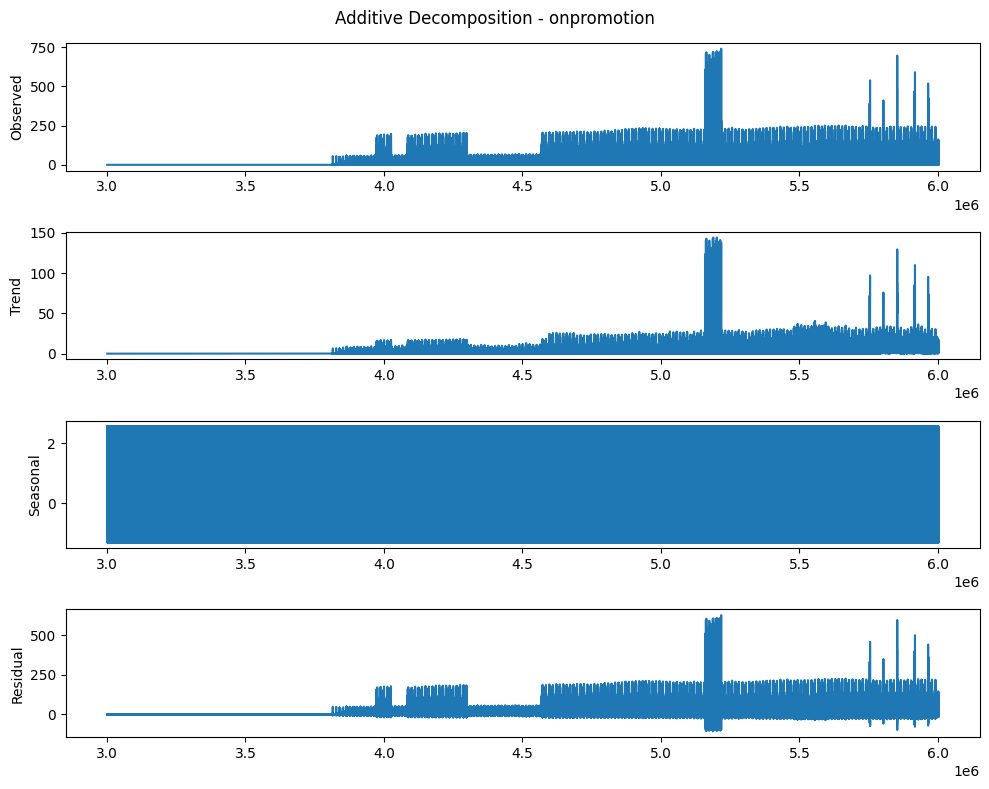

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

metrics = df['metric'].unique()

# Seasonal decomposition on sale and onpromotion
for metric in metrics:
    subset_df = df[df['metric'] == metric]
    decomposition = seasonal_decompose(subset_df['value'], model='additive', period=12)

    # The seasonal components here, plotting them individually
    fig, axes = plt.subplots(4, 1, figsize=(10, 8))
    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    fig.suptitle(f'Additive Decomposition - {metric}')
    plt.tight_layout()
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Classical Decompostion

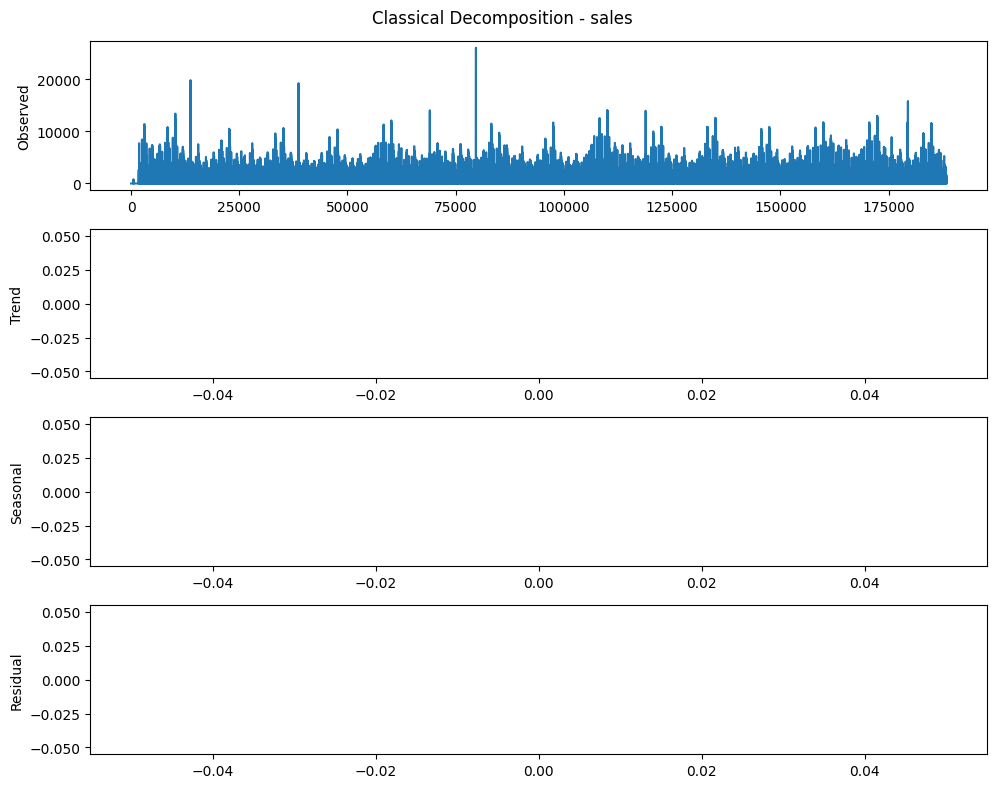

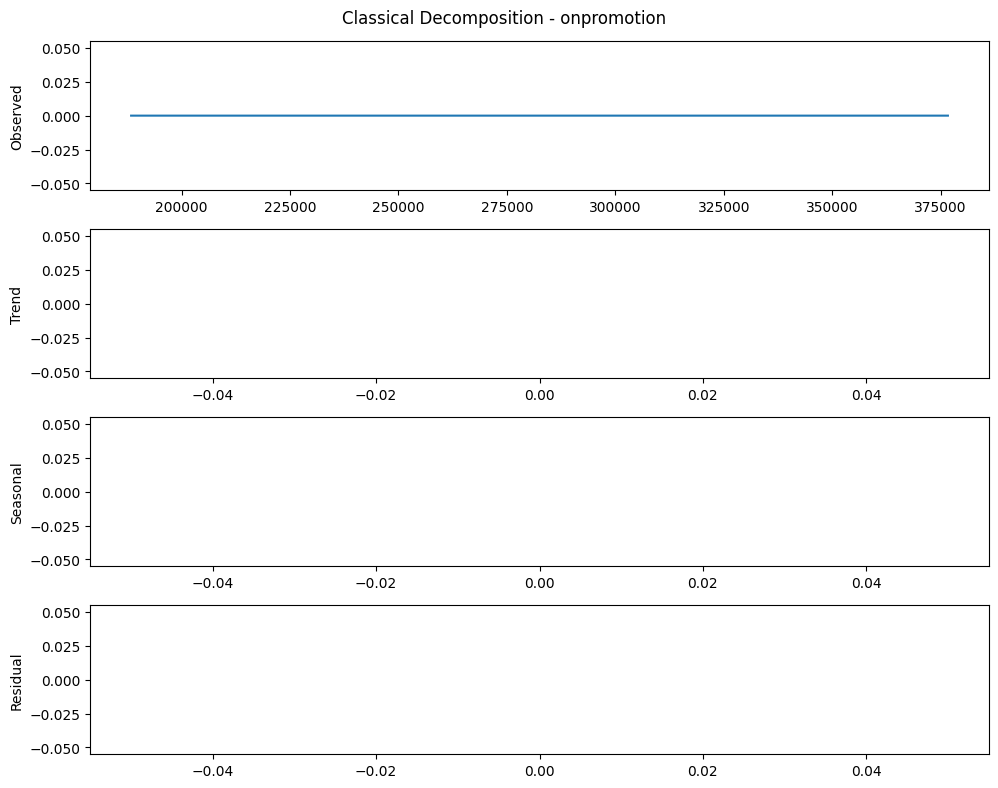

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt

# Converting the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

for metric in df['metric'].unique():
    subset_df = df[df['metric'] == metric].copy()

    # Extracting the trend component using the Hodrick-Prescott filter
    cycle, trend = hpfilter(subset_df['value'], lamb=1600)
    subset_df['trend'] = trend

    # Detrending the data
    subset_df['detrended'] = subset_df['value'] - subset_df['trend']

    # Calculating seasonal component as mean detrended value for each period
    seasonal = subset_df.groupby(subset_df['date'].dt.month)['detrended'].mean()
    subset_df['seasonal'] = subset_df['date'].dt.month.map(seasonal)

    # Calculating residuals
    subset_df['resid'] = subset_df['detrended'] - subset_df['seasonal']

    # Plotting
    fig, axes = plt.subplots(4, 1, figsize=(10, 8))
    subset_df['value'].plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    subset_df['trend'].plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    subset_df['seasonal'].plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    subset_df['resid'].plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    fig.suptitle(f'Classical Decomposition - {metric}')
    plt.tight_layout()
    plt.show()

---

## 2. Time Series Visualization &  3. Description

### Plot 1 Visualization & Plot Description
This first plot is the similar to `autoplot()` in R. This is using the data frame `train_df` as we are interested in projecting sales for our project and this data frame has `sales`

- The plot below displays how the data present here is from 2013 - 2017 and the chart shows how the data is missing months from 2017 since the x-axis tick marks aren't full like they are in the rest of the years.
- The plot displays trends, such as that sales are increasing overall from 2013 - 2017.
- The plot also shows seasonality, as the x-axis nears the end of a year there appears to be a peak. It looks like December appears to be the peak sales for the entire year. This is true for each year present in the data frame.

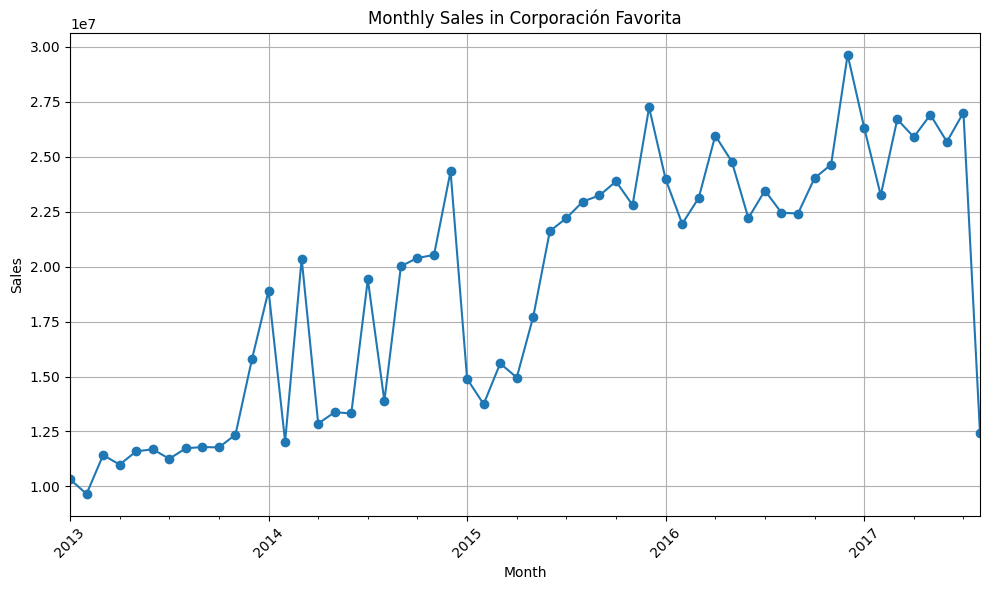

In [ ]:
# Making sure that the date is a date time
train_df['date'] = pd.to_datetime(train_df['date'])

# grabbing the date by month for plotting
monthly_data = train_df.groupby(train_df['date'].dt.to_period('M'))['sales'].sum()


# Plotting the train df below
plt.figure(figsize=(10, 6))
monthly_data.plot(marker='o')

# Focusing on the transactions present in the data frame
plt.title('Monthly Sales in Corporación Favorita')
plt.xlabel('Month')
plt.ylabel('Sales')

# Equivalent to autoplot in R
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

### Plot 2 Visualization & Plot Description

These plots appear to be time series visualizations of sales data, broken down by year, quarter, and month.

**Yearly Sales Plot**:
   - This plot shows the annual total sales from 2013 to 2017.
   - There is a clear upward trend in sales from 2013 to 2016, suggesting growth year over year.
   - However, there's a significant drop in 2017. This could indicate a data issue, such as incomplete data for 2017, or a real decrease in sales. It would be important to understand the reason behind this decrease.



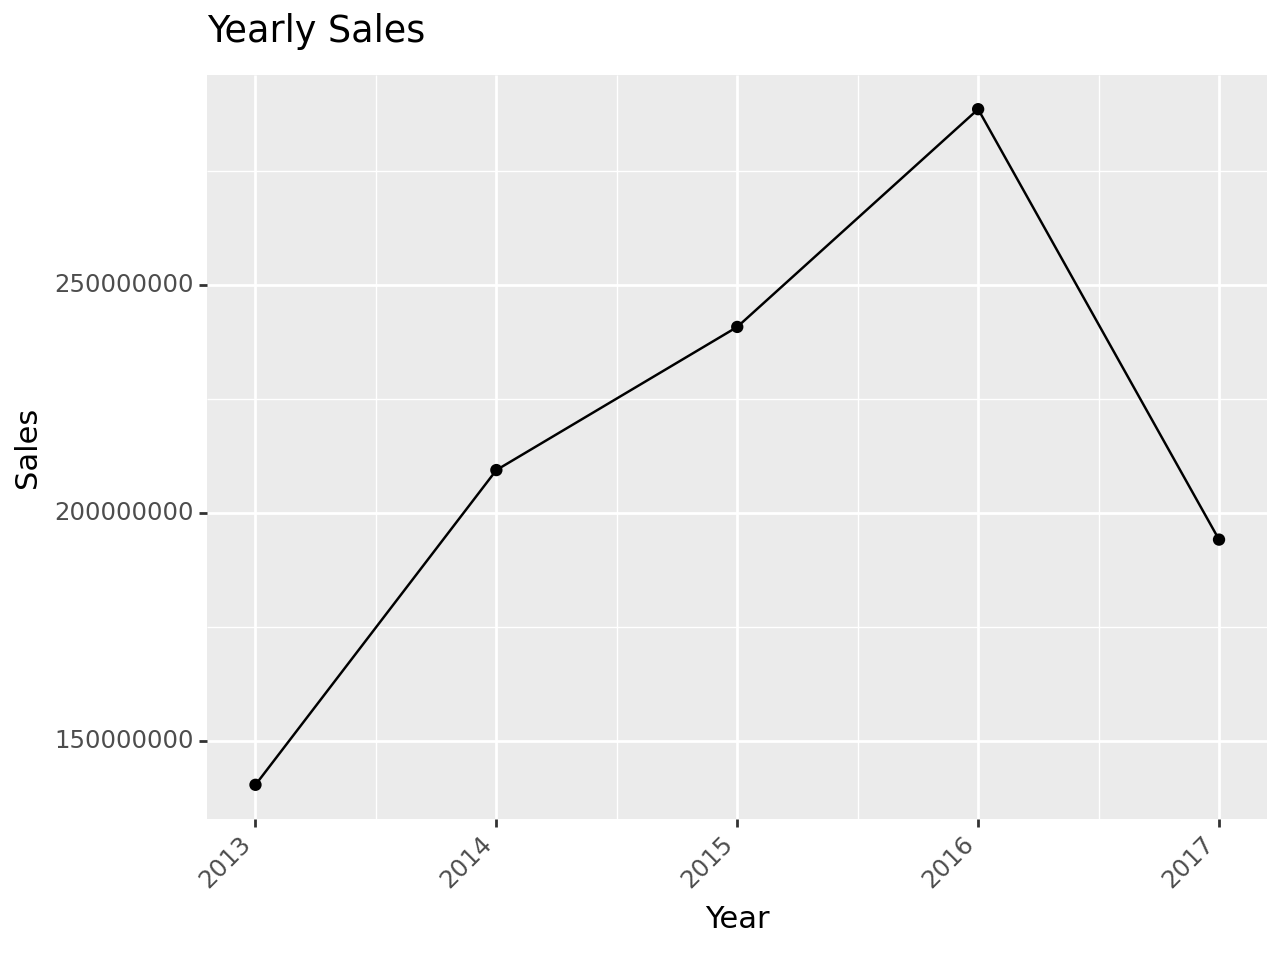

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme, element_text, scale_x_discrete
import calendar


train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['quarter'] = train_df['date'].dt.quarter
train_df['month'] = train_df['date'].dt.month

# Aggregating sales data
yearly_sales = train_df.groupby('year')['sales'].sum().reset_index()
quarterly_sales = train_df.groupby(['year', 'quarter'])['sales'].sum().reset_index()
monthly_sales = train_df.groupby(['year', 'month'])['sales'].sum().reset_index()

# Plotting Yearly Sales
ggplot(yearly_sales, aes(x='year', y='sales')) + geom_line() + geom_point() + \
    labs(title='Yearly Sales', x='Year', y='Sales') + \
    theme(axis_text_x=element_text(rotation=45, hjust=1))


### Plot 3 Visualization & Plot Description


**Quarterly Sales by Year**:
   - Each line represents a year's worth of sales data, divided into quarters.
   - There's a clear seasonality with sales peaking in Q4 for most years, which is common in retail due to the holiday season.
   - There is an exception in one year where Q3 sales are the highest; this could be due to specific events or promotions during that period.
   - Year-on-year, there's variability in sales performance per quarter, indicating that while seasonality is a factor, other variables also significantly impact sales.
   - The sales trajectory for each year varies, suggesting differing yearly trends. For example, the year represented by the yellow line shows a sharp increase in sales from Q2 to Q3 and remains high in Q4, while the year represented by the blue line shows more consistent growth across quarters.

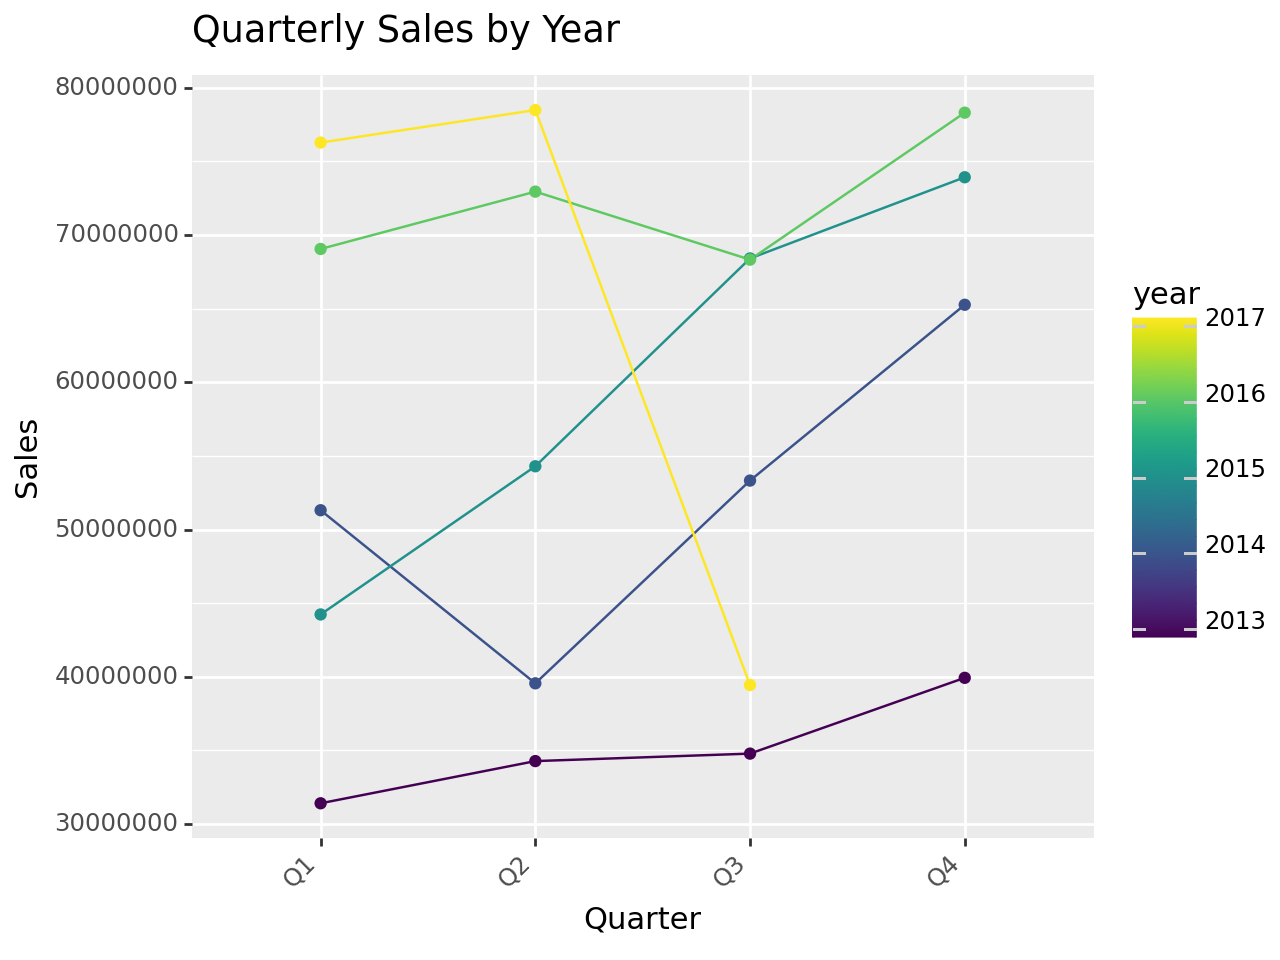

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(quarterly_sales, aes(x='quarter', y='sales', color='year', group='year')) +
    geom_line() +
    geom_point() +
    labs(title='Quarterly Sales by Year', x='Quarter', y='Sales') +
    scale_x_discrete(limits=range(1, 5), labels=['Q1', 'Q2', 'Q3', 'Q4']) +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)


### Plot 4 Visualization & Plot Description



2. **Monthly Sales by Year**:
   - Sales trends are broken down month by month for each year, offering a more detailed view of seasonality.
   - As with the quarterly data, sales generally peak towards the end of the year, particularly in December.
   - There are some notable dips, for instance, the year represented by the blue line shows a significant decrease in sales during mid-year, which recovers by the end of the year.
   - The chart highlights the volatility of sales on a month-to-month basis. For example, the yellow line indicates a year where there was a sharp fall followed by a sharp rise from one month to the next.
   - Some years show more stability from month to month, whereas others show more pronounced fluctuations.

Overall, both charts illustrate the intricacies of sales patterns, with clear seasonal peaks towards the end of the year. The monthly chart, in particular, displays finer variations that could be tied to specific monthly events or promotions. It is also evident that the sales performance is not uniform across years, and each year has its unique profile of sales. Such insights could inform strategic business decisions, such as inventory planning, marketing strategies, and resource allocation to capitalize on peak sales periods and bolster sales during the lower-performing months.

For each plot, the team working on this project should investigate the following:
- **Data Completeness**: Confirm whether the 2017 sales data is complete. The sudden drop in yearly sales is unusual and warrants a closer look.
- **External Factors**: Identify any external factors that may have influenced sales patterns, such as economic conditions, changes in consumer behavior, or company initiatives like marketing campaigns.

- **Data Quality**: Check for errors in the data that may affect the visualizations, such as missing values or incorrect aggregation.
- **Statistical Testing**: Consider performing statistical tests for seasonality and trend to quantify the observed patterns.
- **Model Relevance**: Based on these visualizations, consider the appropriateness of different time series models that can account for the observed trends and seasonality.

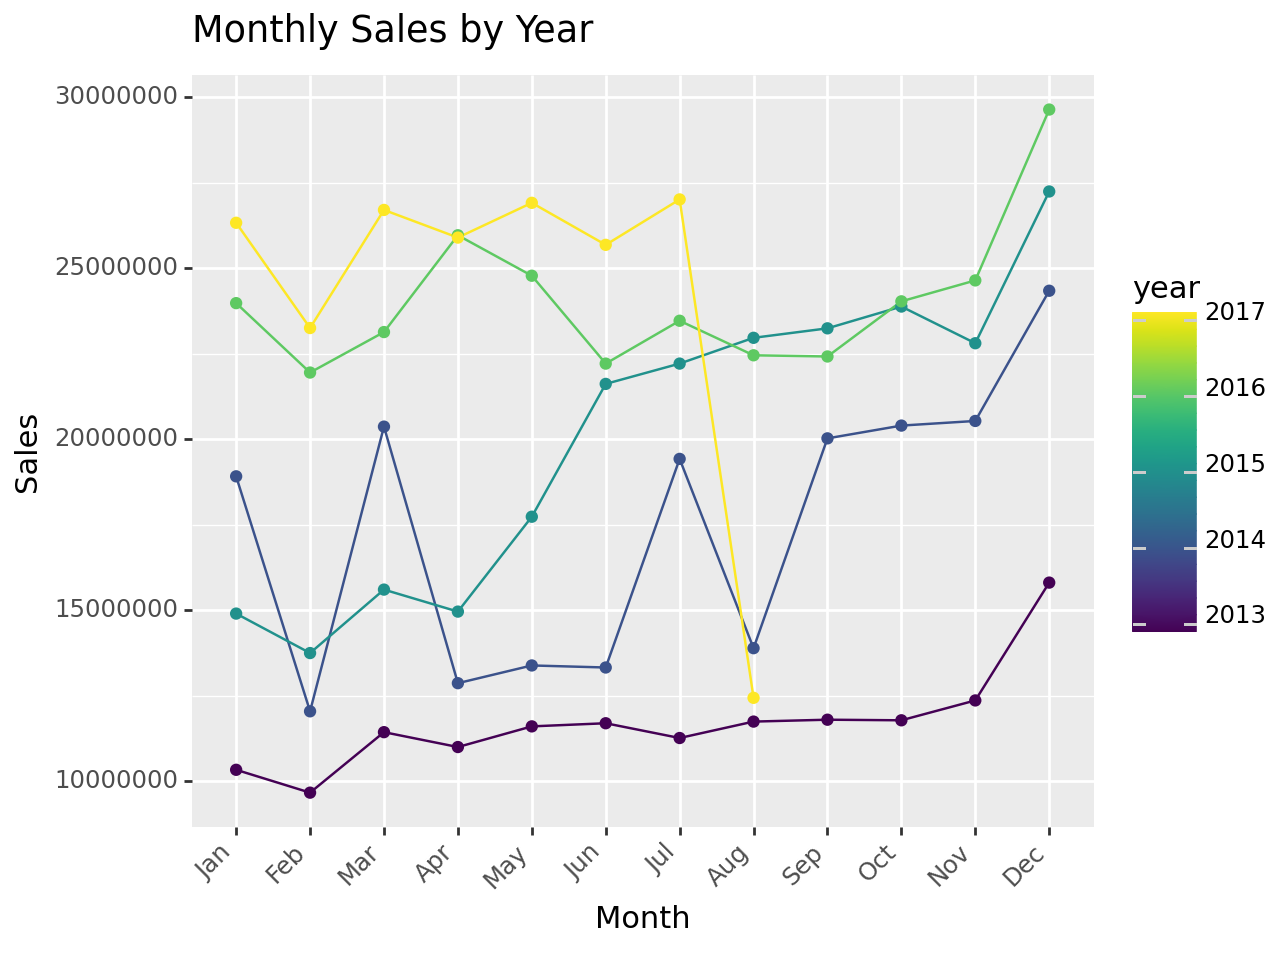

<Figure Size: (640 x 480)>

In [ ]:
import pandas as pd

monthly_sales['month_factor'] = pd.Categorical(monthly_sales['month'])

(
    ggplot(monthly_sales, aes(x='month', y='sales', color='year', group='year')) +
    geom_line() +
    geom_point() +
    labs(title='Monthly Sales by Year', x='Month', y='Sales') +
    scale_x_discrete(limits=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=calendar.month_abbr[1:13]) +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)



### Plot 5 Visualization & Plot Description

The autocorrelation plot below shows the trend that we saw during the initial EDA. We see repeating trends at certain intervals, and positive and negative autocorrelations observed at different lags.

- There is a strong positive autocorrelation up until lag 50.
- Next we can see how there's a slow decline from lag 50 until lag 150
- From lag 100 until lag 150 we can see how there's a negative autocorrelation and that pattern stays consistant after
- Around lag 150 and lag 200 we can see how the trend is consistant here, with the negative autocorrelation
- After 200 there's a return to 0 for the autocorrelation


---



## 4. TS Models

## ARIMA Model
### ARIMA Model Pre-Work

First, a new data frame is created `train_df_weekly` which is looking at weekly data, because it'll be interested to see what the ARIMA result is for weekly data

In [ ]:
# This is creating a new data frame so that we can run the model
train_df['date'] = pd.to_datetime(train_df['date'])

# setting the date as index
train_df.set_index('date', inplace=True)

# Interested in a model that looks at weekly data
train_df_weekly = train_df.resample('W').sum()

# Adjusting 'sales' column to numeric, replacing non-numeric values with 0
train_df_weekly['sales'] = pd.to_numeric(train_df_weekly['sales'], errors='coerce').fillna(0)

# Adjusting 'sales' again, astype because just the to_numeric wasn't actually making this a numeric field
train_df_weekly['sales'] = train_df_weekly['sales'].astype(int)

<ipython-input-16-a5ef046cef1e>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [ ]:
# Verifying that int64 is the data type for sales so that we can run autocorrelation on it
print(train_df_weekly.dtypes)

id             int64
store_nbr      int64
sales          int64
onpromotion    int64
dtype: object


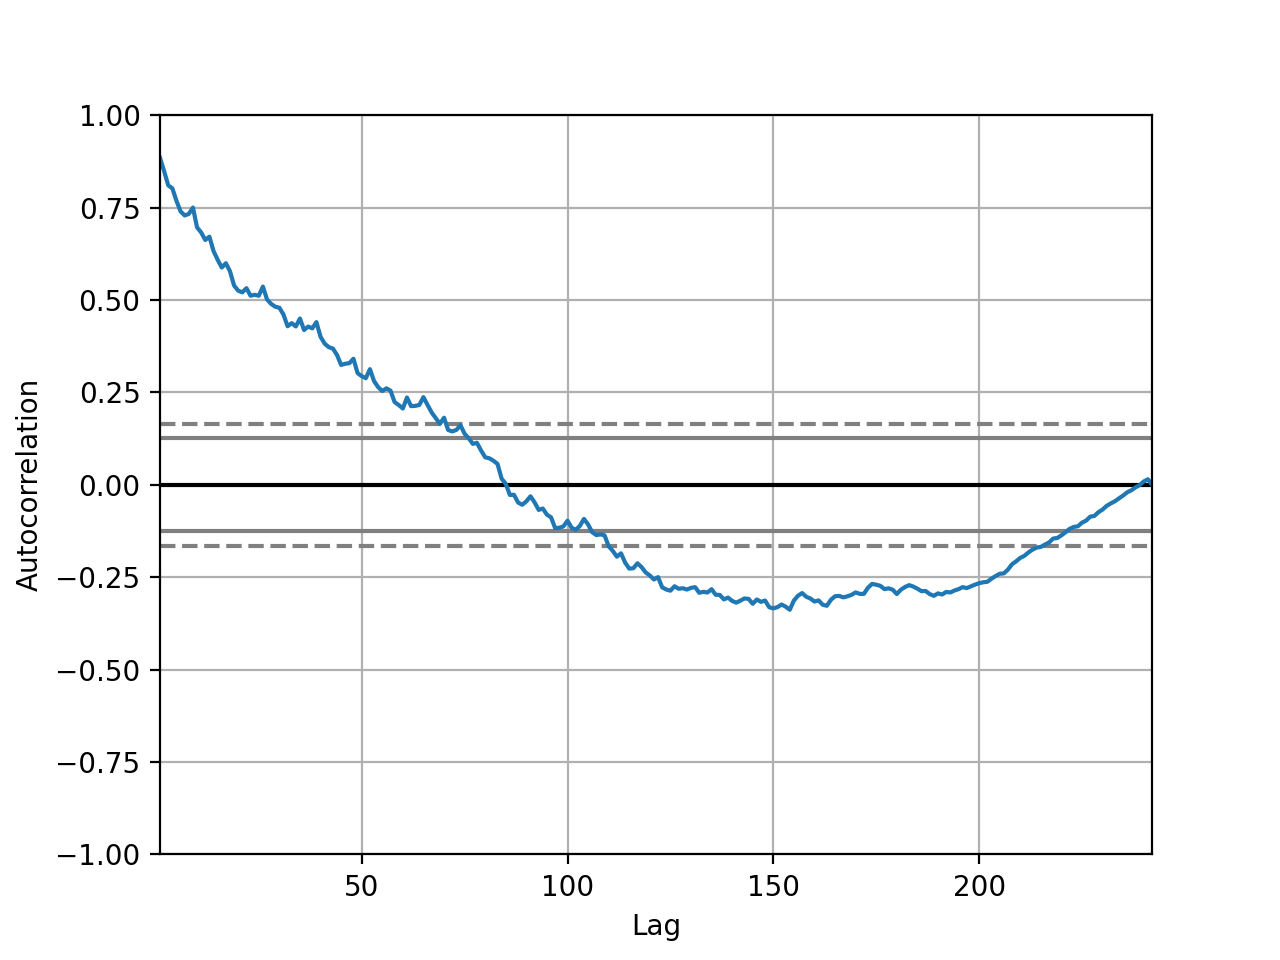

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# autocorrelation for the 'sales' column since it's what we'll perform the model on
autocorrelation_plot(train_df_weekly['sales'])
plt.show()

### ARIMA Model Grid Search

We're interested in seeing the results of an ARIMA model and are using a grid search to find the best parameters for p,d,q

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# changing data type to float
train_df_weekly['sales'] = train_df_weekly['sales'].astype(float)

# Defining the function to evaluate an ARIMA model for a given order (p, d, q)
def evaluate_arima_model(train_data, test_data, arima_order):
    history = [x for x in train_data]
    predictions = list()
    for t in range(len(test_data)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test_data[t])
    rmse = sqrt(mean_squared_error(test_data, predictions))
    return rmse

# Defining the function to evaluate combinations of p, d, and q values for an ARIMA model
def evaluate_models(train_data, test_data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(train_data, test_data, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [ ]:
import warnings
warnings.filterwarnings('ignore')

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

split_ratio = 0.66
split_index = int(len(train_df_weekly['sales']) * split_ratio)
train_data = train_df_weekly['sales'][:split_index]
test_data = train_df_weekly['sales'][split_index:]
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=810842.824
ARIMA(0, 0, 1) RMSE=804003.298
ARIMA(0, 0, 2) RMSE=824084.699
ARIMA(0, 1, 0) RMSE=841421.228
ARIMA(0, 1, 1) RMSE=837225.507
ARIMA(0, 1, 2) RMSE=836828.784
ARIMA(0, 2, 0) RMSE=743907.486
ARIMA(0, 2, 1) RMSE=751798.793
ARIMA(0, 2, 2) RMSE=788402.605
ARIMA(1, 0, 0) RMSE=817309.993
ARIMA(1, 0, 1) RMSE=839650.821
ARIMA(1, 0, 2) RMSE=837394.193
ARIMA(1, 1, 0) RMSE=837538.846
ARIMA(1, 1, 1) RMSE=837143.636
ARIMA(1, 1, 2) RMSE=842897.417
ARIMA(1, 2, 0) RMSE=750819.099
ARIMA(1, 2, 1) RMSE=809864.480
ARIMA(1, 2, 2) RMSE=973330.306
ARIMA(2, 0, 0) RMSE=830758.836
ARIMA(2, 0, 1) RMSE=841698.858
ARIMA(2, 0, 2) RMSE=801566.771
ARIMA(2, 1, 0) RMSE=835877.878
ARIMA(2, 1, 1) RMSE=838937.443
ARIMA(2, 1, 2) RMSE=812959.373
ARIMA(2, 2, 0) RMSE=756854.879
ARIMA(2, 2, 1) RMSE=816370.476
ARIMA(4, 0, 0) RMSE=810957.162
ARIMA(4, 0, 1) RMSE=810768.784
ARIMA(4, 1, 0) RMSE=831294.946
ARIMA(4, 1, 1) RMSE=923165.362
ARIMA(4, 1, 2) RMSE=829512.724
ARIMA(4, 2, 2) RMSE=786586.907
ARIMA(6,

After determining the best parameters to use, decided to go with `Best ARIMA(8, 0, 2) RMSE=669833.771`

In [ ]:
split_ratio = 0.66
split_index = int(len(train_df_weekly['sales']) * split_ratio)
train_data = train_df_weekly['sales'][:split_index]
test_data = train_df_weekly['sales'][split_index:]

We're looking at the summary for the arima model using the `order=(8,0,2)` as this was the best given the grid search that we did.

In [ ]:
# Fitting ARIMA model
model = ARIMA(train_data, order=(8, 0, 2))
model_fit = model.fit()

# Summary of the fitted model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  159
Model:                 ARIMA(8, 0, 2)   Log Likelihood               -2289.188
Date:                Sun, 31 Mar 2024   AIC                           4602.377
Time:                        15:46:09   BIC                           4639.203
Sample:                    01-06-2013   HQIC                          4617.332
                         - 01-17-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.801e+06   5.16e-10   7.37e+15      0.000     3.8e+06     3.8e+06
ar.L1          0.9037      0.110      8.252      0.000       0.689       1.118
ar.L2         -0.6701      0.154     -4.338      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


---



## 5. Predictions

## ARIMA Predictions

The two plots that follow are the predictions for the ARIMA model. The difference between these is what date range is being compared against the forecast.

The prediction plot below demonstrates the predictions during the same time period as the test data, meaning that is the prediction for data that is inside of the dataset.

- The graph shows the train data which covers weekly data from 2013 - 2016, the test data is from 2016 until the end of the data range at 2017, and this is different than the prior plot because the forecast is for the test data, we are comparing in a date range available inside the data set
- The forecast shows a comparable value, compared to the test data set, it looks like it's in between the test data. Meaning that it isn't on the upper bound or the lower bound of the test data, it's hanging out in the middle.
- The forecast shading also shows how the bounds are broad, which matches the data that we see here inside of the test data.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


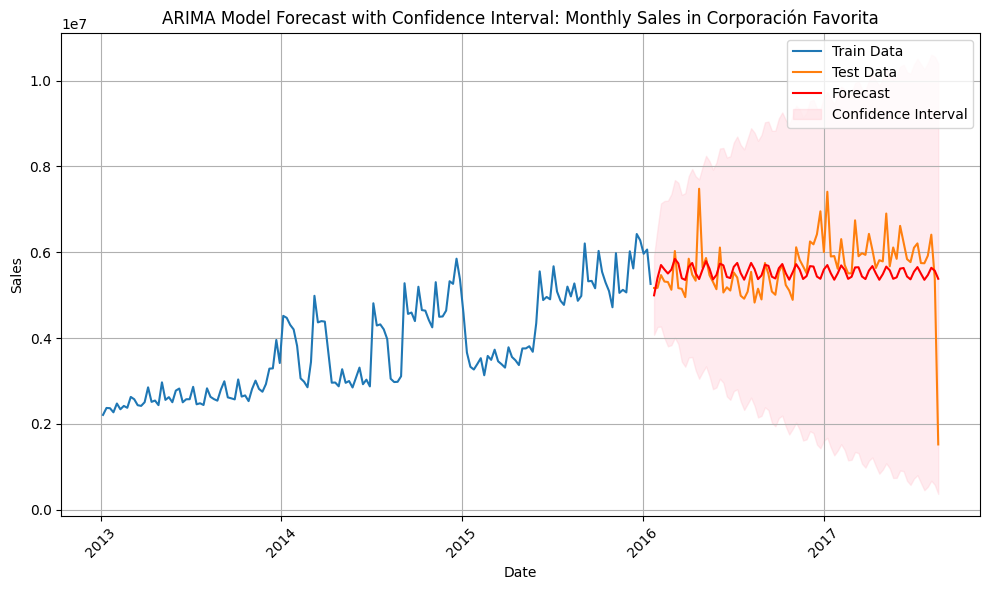

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

train_data = train_df_weekly['sales'][:split_index]
test_data = train_df_weekly['sales'][split_index:]

# Fitting an ARIMA model to the training data
model = ARIMA(train_data, order=(8, 0, 2))
model_fit = model.fit()

# Get the forecasted values and confidence intervals
forecast_results = model_fit.get_forecast(steps=len(test_data), alpha=0.05)  # Adjust alpha as needed
forecast_values = forecast_results.predicted_mean
forecast_conf_int = forecast_results.conf_int()

# Converting Pandas Series to NumPy arrays
train_dates = train_data.index.values
train_values = train_data.values
test_dates = test_data.index.values
test_values = test_data.values

# Get the forecasted dates starting from the last date in the test set
forecast_dates = pd.date_range(start=test_dates[0], periods=len(test_data), freq='W')

# Ploting original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(train_dates, train_values, label='Train Data')
plt.plot(test_dates, test_values, label='Test Data')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')

# Filling area between upper and lower confidence intervals
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Model Forecast with Confidence Interval: Monthly Sales in Corporación Favorita')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This also an ARIMA prediction.

- The graph shows the train data which covers weekly data from 2013 - 2016, the test data is from 2016 until the end of the data range at 2017, while the forecast is for data after the date range available in this data set
- The forecast shows a decrease and trends more similar to the end of the test data, the confidence interval also shows a wider range here

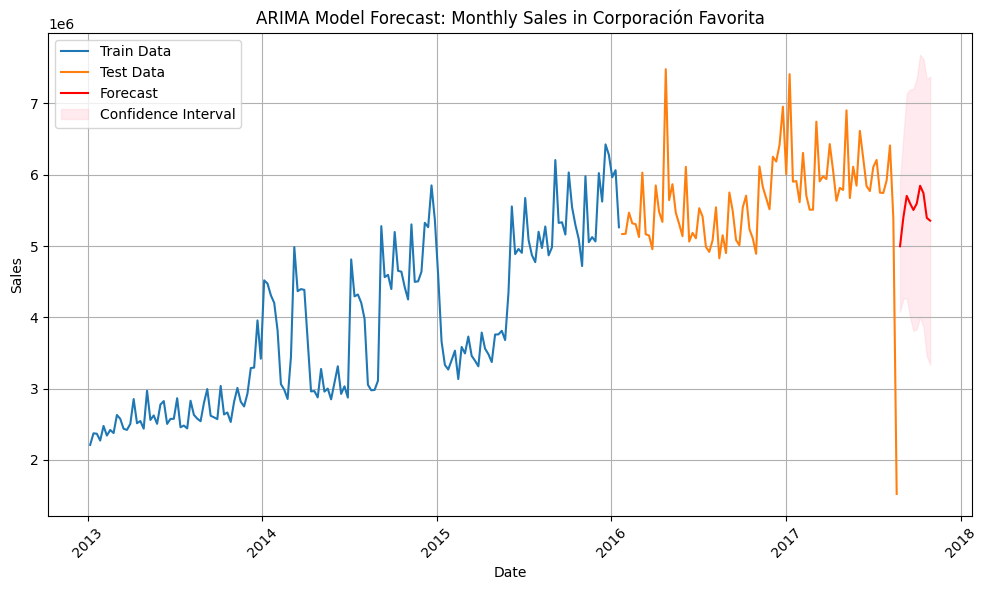

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Converting to NumPy arrays
train_dates = train_data.index.values
train_values = train_data.values
test_dates = test_data.index.values
test_values = test_data.values

test_dates = np.array(test_dates)
test_values = np.array(test_values)

# Looking at a few steps into the future, this is after the date range available in our train_df
forecast_steps = 10

# The predictions
forecast_values = model_fit.forecast(steps=forecast_steps)

# Forecast starts from the last date in the test set
forecast_dates = pd.date_range(start=test_dates[-1], periods=forecast_steps + 1, freq='W')[1:]

# Converting forecast_dates and forecast_values to numpy arrays
forecast_dates = np.array(forecast_dates)
forecast_values = np.array(forecast_values)

# Predictions plot
plt.figure(figsize=(10, 6))
plt.plot(train_dates, train_values, label='Train Data')
plt.plot(test_dates, test_values, label='Test Data')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')

# Showing the upper and lower confidence intervals
forecast_conf_int = model_fit.get_forecast(steps=forecast_steps).conf_int()
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0].values, forecast_conf_int.iloc[:, 1].values, color='pink', alpha=0.3, label='Confidence Interval')

# The final prediction plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Model Forecast: Monthly Sales in Corporación Favorita')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Naive forecast RMSE: 852680.945


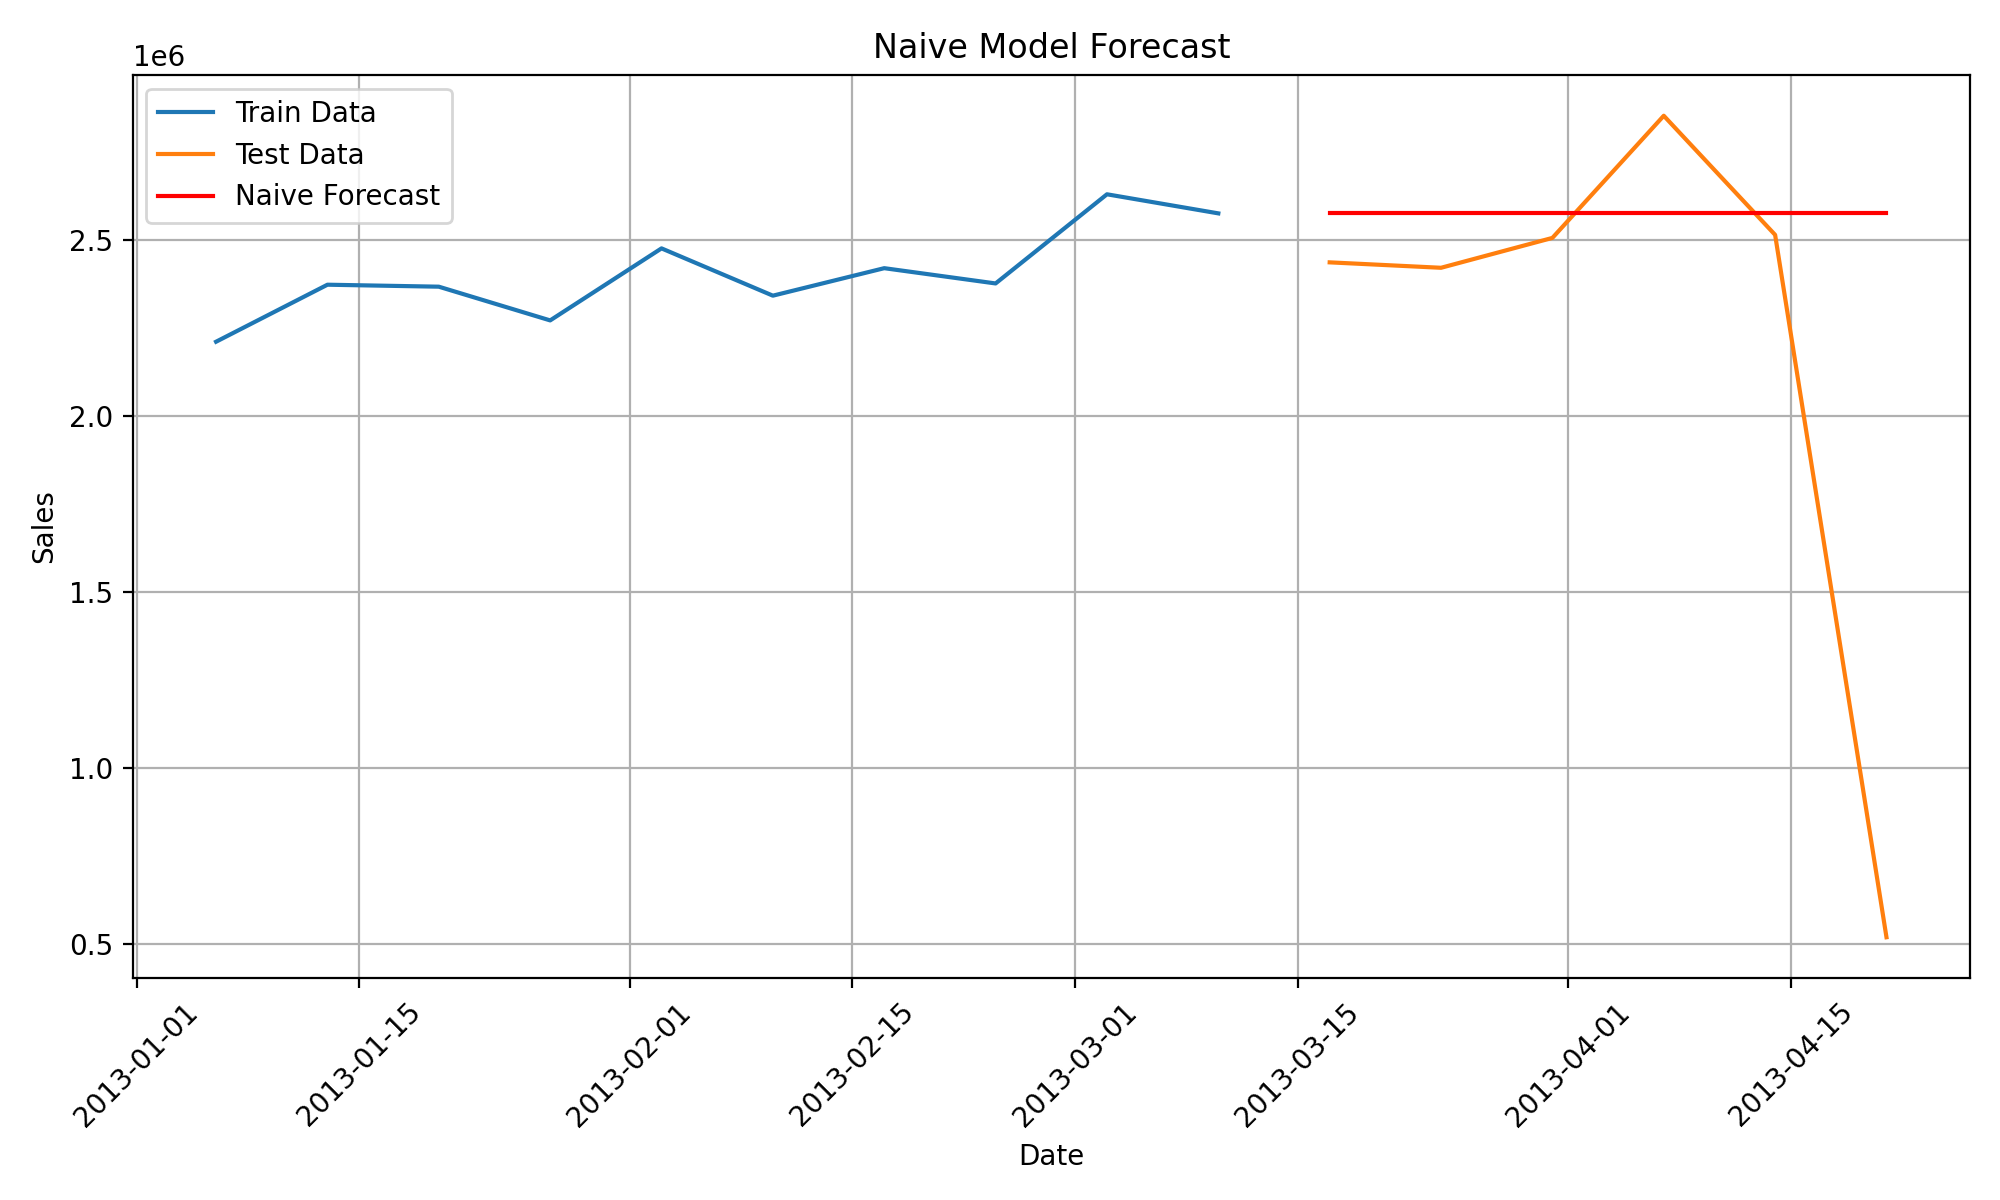

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt


# The training and test data split has already been defined
train_data = train_df_weekly['sales'][:split_index]
test_data = train_df_weekly['sales'][split_index:]

# The naive forecast will be the last observed value from the training set
last_observed = train_data.iloc[-1]
naive_forecast = [last_observed] * len(test_data)

# Calculating RMSE for the naive forecast
rmse = sqrt(mean_squared_error(test_data, naive_forecast))
print('Naive forecast RMSE: %.3f' % rmse)

# Visualizing the train data, test data, and the naive forecast
plt.figure(figsize=(10, 6))
train_dates = train_data.index.values
test_dates = test_data.index.values

plt.plot(train_dates, train_data.values, label='Train Data')
plt.plot(test_dates, test_data.values, label='Test Data')
plt.plot(test_dates, naive_forecast, label='Naive Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Naive Model Forecast')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## NAIVE

Naive model is the simplest form of forecasting which assumes that the future will exactly replicate the most recent observed data point. It doesn't account for any trends, seasonality, or patterns in the data.

So for each predicted time point, the Naive model simply says "the future sales will be exactly what the last sales figure was." If the last observed sales were 100 units, then all future sales, according to the Naive model, are forecasted to be 100 units as well. This is why the forecasted values are a flat line — the model does not change its prediction regardless of how far into the future it's forecasting.

This model is helpful as a baseline; more sophisticated models should ideally perform better than this. If a more complex model does not perform better than the Naive model, it suggests that the model is not capturing the underlying patterns in the data effectively.

Naive forecast RMSE on the test set: 852680.945


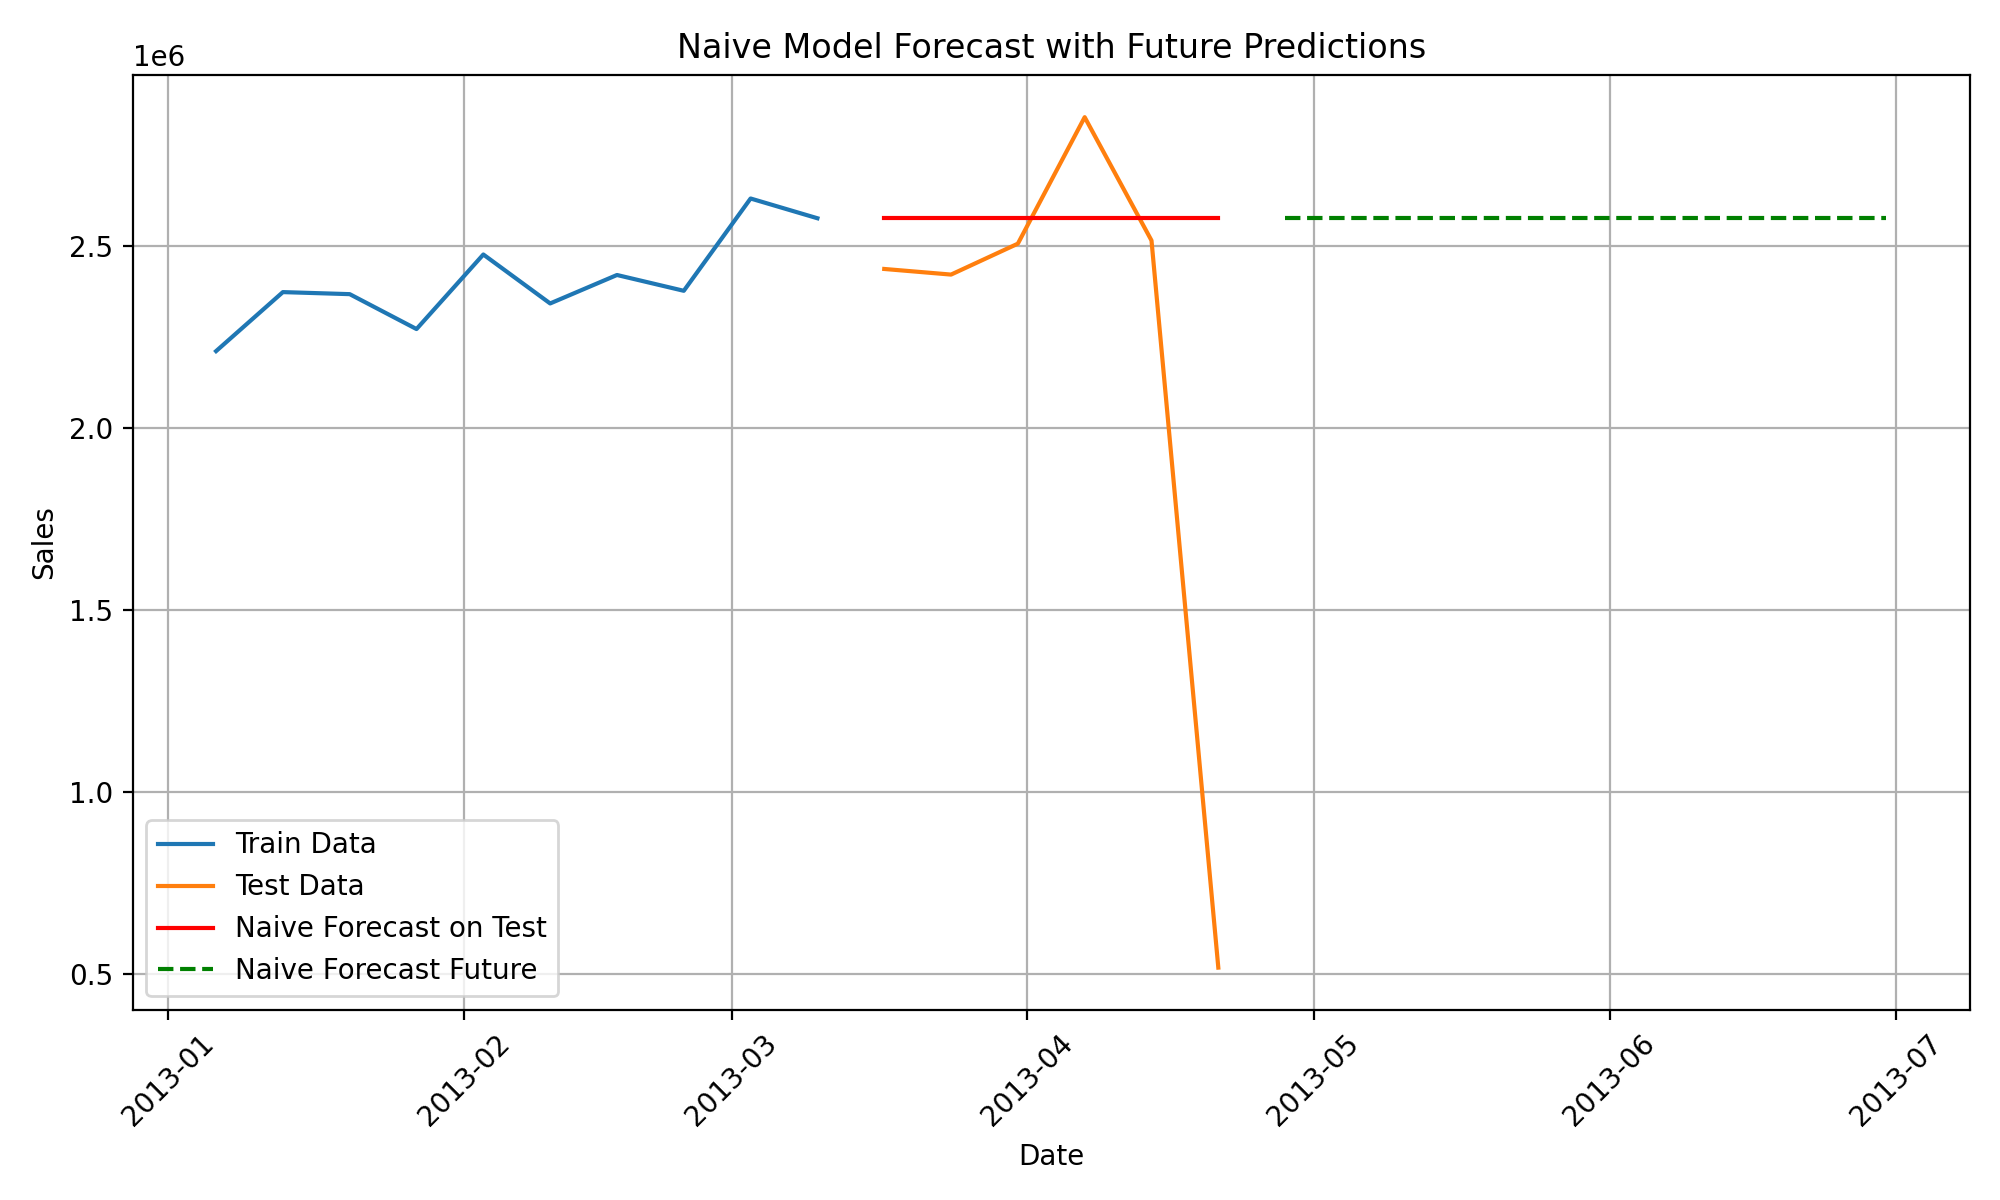

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# `train_df_weekly` and `split_index` are already defined

# The training and test data split has already been defined
train_data = train_df_weekly['sales'][:split_index]
test_data = train_df_weekly['sales'][split_index:]

# The naive forecast will be the last observed value from the training set
last_observed = train_data.iloc[-1]
naive_forecast_test = [last_observed] * len(test_data)

# Calculating RMSE for the naive forecast on the test set
rmse = sqrt(mean_squared_error(test_data, naive_forecast_test))
print('Naive forecast RMSE on the test set: %.3f' % rmse)

# Future predictions beyond the test set
forecast_horizon = 10  # Number of future periods to forecast
naive_forecast_future = [last_observed] * forecast_horizon
future_dates = pd.date_range(start=test_data.index[-1], periods=forecast_horizon + 1, freq='W')[1:]

# Converting to numpy arrays
future_dates = np.array(future_dates)
naive_forecast_future = np.array(naive_forecast_future)

# Visualizing the train data, test data, and the naive forecast
plt.figure(figsize=(10, 6))
train_dates = train_data.index.values
test_dates = test_data.index.values

plt.plot(train_dates, train_data.values, label='Train Data')
plt.plot(test_dates, test_data.values, label='Test Data')
plt.plot(test_dates, naive_forecast_test, label='Naive Forecast on Test', color='red')
plt.plot(future_dates, naive_forecast_future, label='Naive Forecast Future', color='green', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Naive Model Forecast with Future Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Naive Model Forecast with Future Predictions

- <span style="color:blue">**Blue Line (Train Data):**</span> Represents the historical sales data used to train the model, showing actual sales up to the split between training and testing data.

- <span style="color:orange">**Orange Line (Test Data):**</span> Indicates the actual sales data reserved for testing the model, following the last point in the training data.

- <span style="color:red">**Red Line (Naive Forecast on Test):**</span> Shows the Naive model predictions for the test set. The forecast is a horizontal line, suggesting that future values are predicted to be constant, equal to the last observed value in the training data.

- <span style="color:green">**Green Dashed Line (Naive Forecast Future):**</span> Depicts the Naive model's forecasts for future time periods beyond the test set. The prediction is presented as a dashed line, extending the last observed sales value into the future, under the assumption that sales levels will persist indefinitely without change.


# LSTM

**LSTM (Long Short-Term Memory)**

LSTM is a type of recurrent neural network capable of learning long-term dependencies in data. It's particularly well-suited for sequences and time series data because of its ability to maintain information in its memory for extended periods. The LSTM model displayed here captures complex patterns in the historical sales data, which may include trends and seasonality.

Epoch 1/100
160/160 - 5s - loss: 0.1575 - 5s/epoch - 29ms/step
Epoch 2/100
160/160 - 0s - loss: 0.0535 - 357ms/epoch - 2ms/step
Epoch 3/100
160/160 - 0s - loss: 0.0308 - 397ms/epoch - 2ms/step
Epoch 4/100
160/160 - 1s - loss: 0.0271 - 503ms/epoch - 3ms/step
Epoch 5/100
160/160 - 1s - loss: 0.0244 - 804ms/epoch - 5ms/step
Epoch 6/100
160/160 - 1s - loss: 0.0220 - 844ms/epoch - 5ms/step
Epoch 7/100
160/160 - 1s - loss: 0.0195 - 698ms/epoch - 4ms/step
Epoch 8/100
160/160 - 1s - loss: 0.0173 - 1s/epoch - 7ms/step
Epoch 9/100
160/160 - 1s - loss: 0.0152 - 826ms/epoch - 5ms/step
Epoch 10/100
160/160 - 1s - loss: 0.0134 - 514ms/epoch - 3ms/step
Epoch 11/100
160/160 - 1s - loss: 0.0117 - 558ms/epoch - 3ms/step
Epoch 12/100
160/160 - 1s - loss: 0.0106 - 516ms/epoch - 3ms/step
Epoch 13/100
160/160 - 0s - loss: 0.0094 - 485ms/epoch - 3ms/step
Epoch 14/100
160/160 - 0s - loss: 0.0085 - 452ms/epoch - 3ms/step
Epoch 15/100
160/160 - 0s - loss: 0.0080 - 287ms/epoch - 2ms/step
Epoch 16/100
160/160 - 0

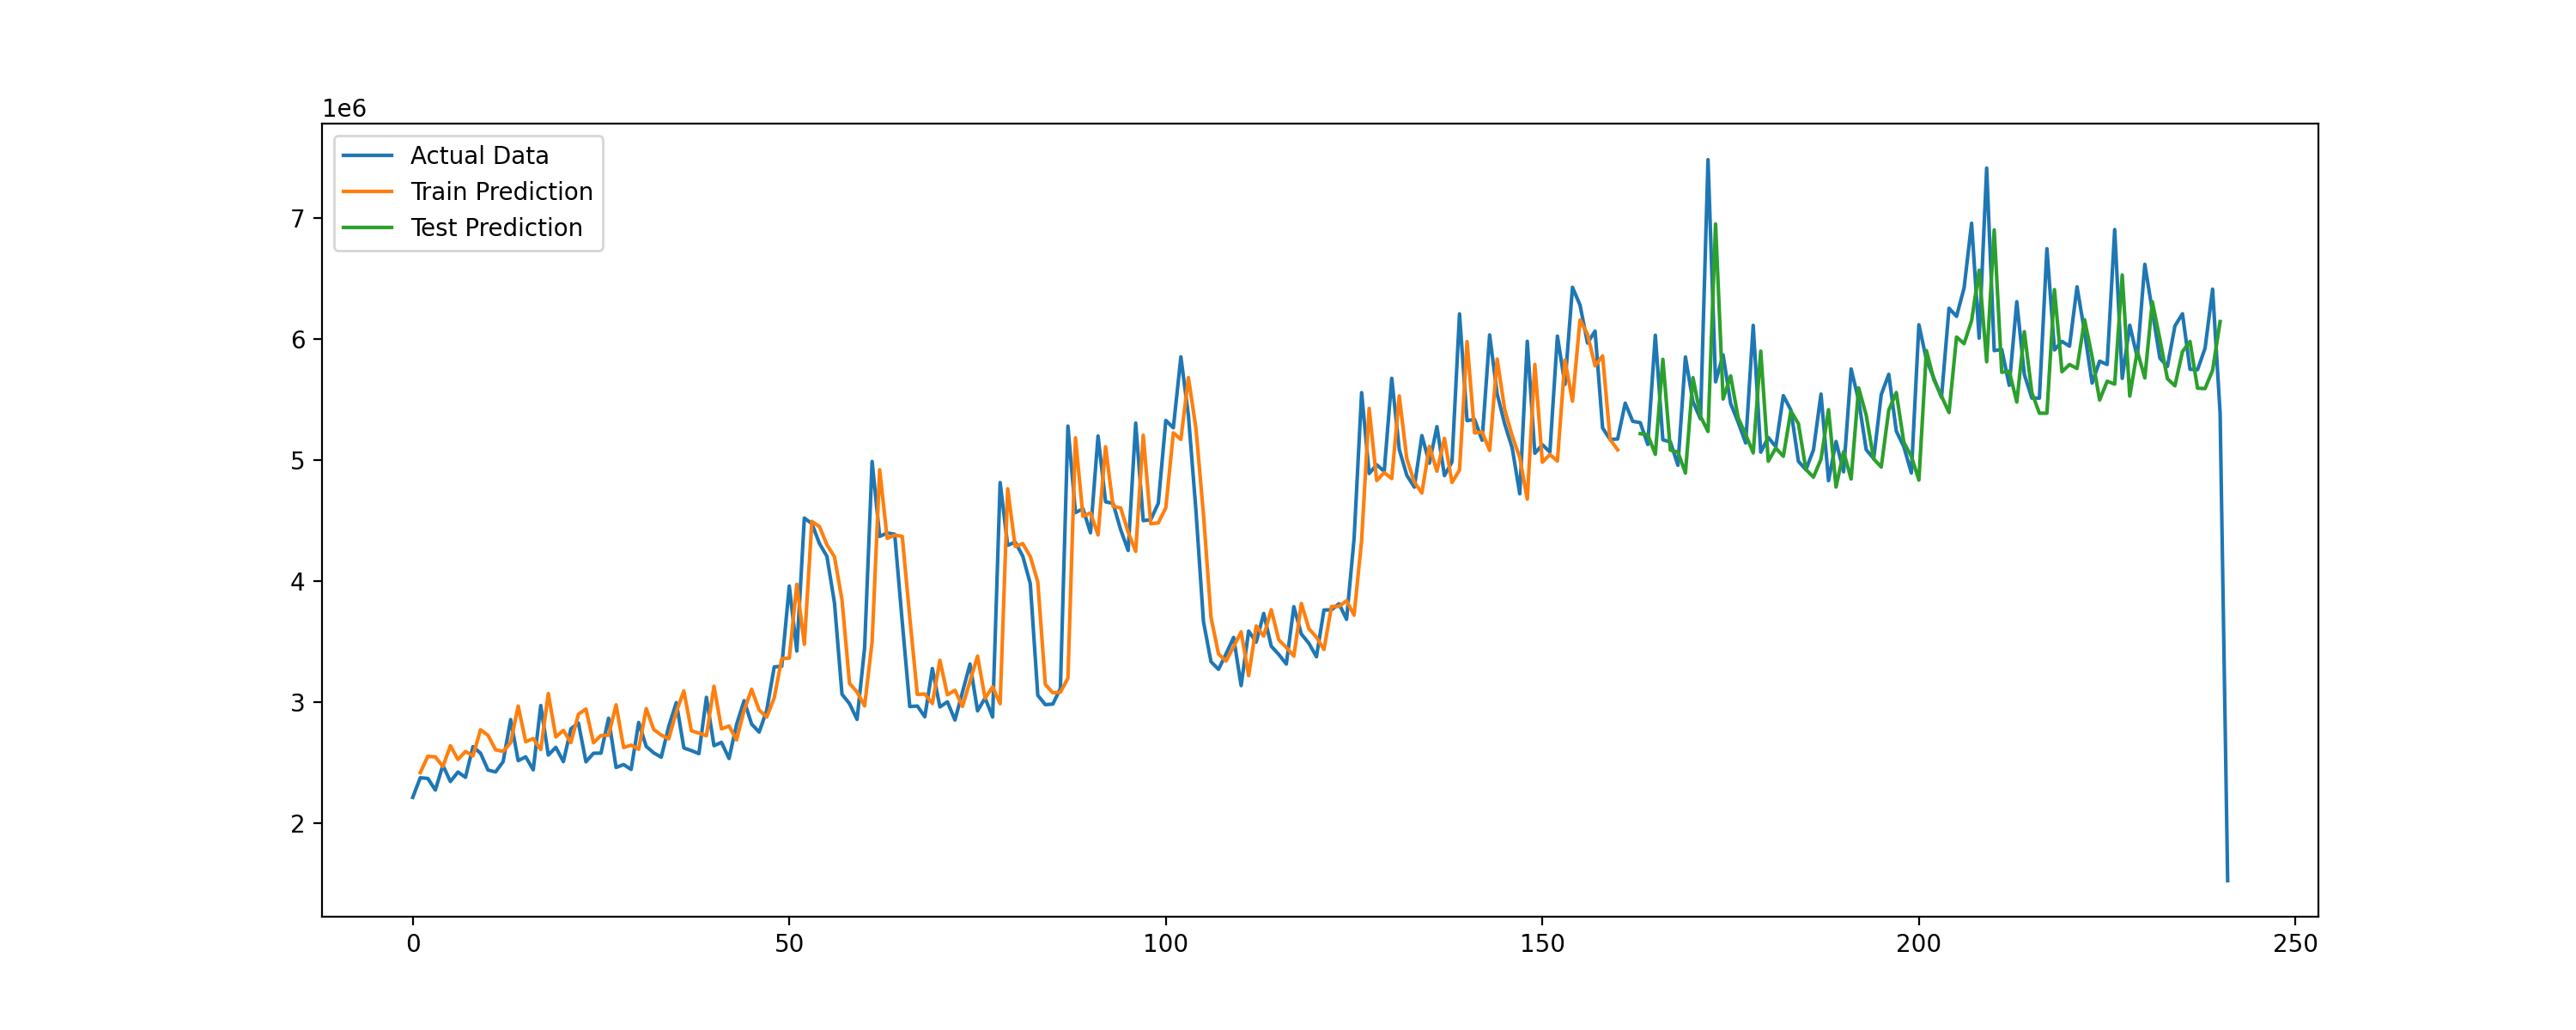

Train Score: 479514.84 RMSE
Test Score: 619110.86 RMSE


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


# Resampling the data to weekly frequency, summing up the sales
train_df_weekly = train_df['sales'].resample('W').sum().values.reshape(-1, 1)

# Normalizing the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_df_weekly_scaled = scaler.fit_transform(train_df_weekly)

# Splitting into train and test sets
train_size = int(len(train_df_weekly_scaled) * 0.67)
test_size = len(train_df_weekly_scaled) - train_size
train, test = train_df_weekly_scaled[0:train_size,:], train_df_weekly_scaled[train_size:len(train_df_weekly_scaled),:]

# Converting an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshaping into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshaping input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Creating and fitting the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Makeing predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverting predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


# Adjust the plot indices for training predictions
trainPredictPlot = np.empty_like(train_df_weekly_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Adjust the plot indices for test predictions
testPredictPlot = np.empty_like(train_df_weekly_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(train_df_weekly_scaled)-1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(train_df_weekly_scaled), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()


# # Calculate root mean squared error
trainScore = sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



In the provided results, the LSTM achieved a lower RMSE on the training set and a reasonably good RMSE on the test set. This suggests that the LSTM has learned the underlying patterns in the training data without overfitting, as evidenced by its performance on unseen test data. Its predictions seem to follow the actual sales closely, making it a strong candidate for this time series forecasting task.

However, LSTMs are computationally expensive to train and can be difficult to interpret. Despite these challenges, if the priority is forecast accuracy, and if we have the computational resources, LSTMs can be a good choice.

# SNAIVE

**SNAIVE (Seasonal Naive)**

The SNAIVE method is a variation of the naive forecast that accounts for seasonality. It assumes that the seasonal pattern will repeat itself from the last observed season. In this case, it forecasts future sales based on the sales from the corresponding season in the previous cycle, typically the same day or week from the last observed year.

Test RMSE: 817502.034


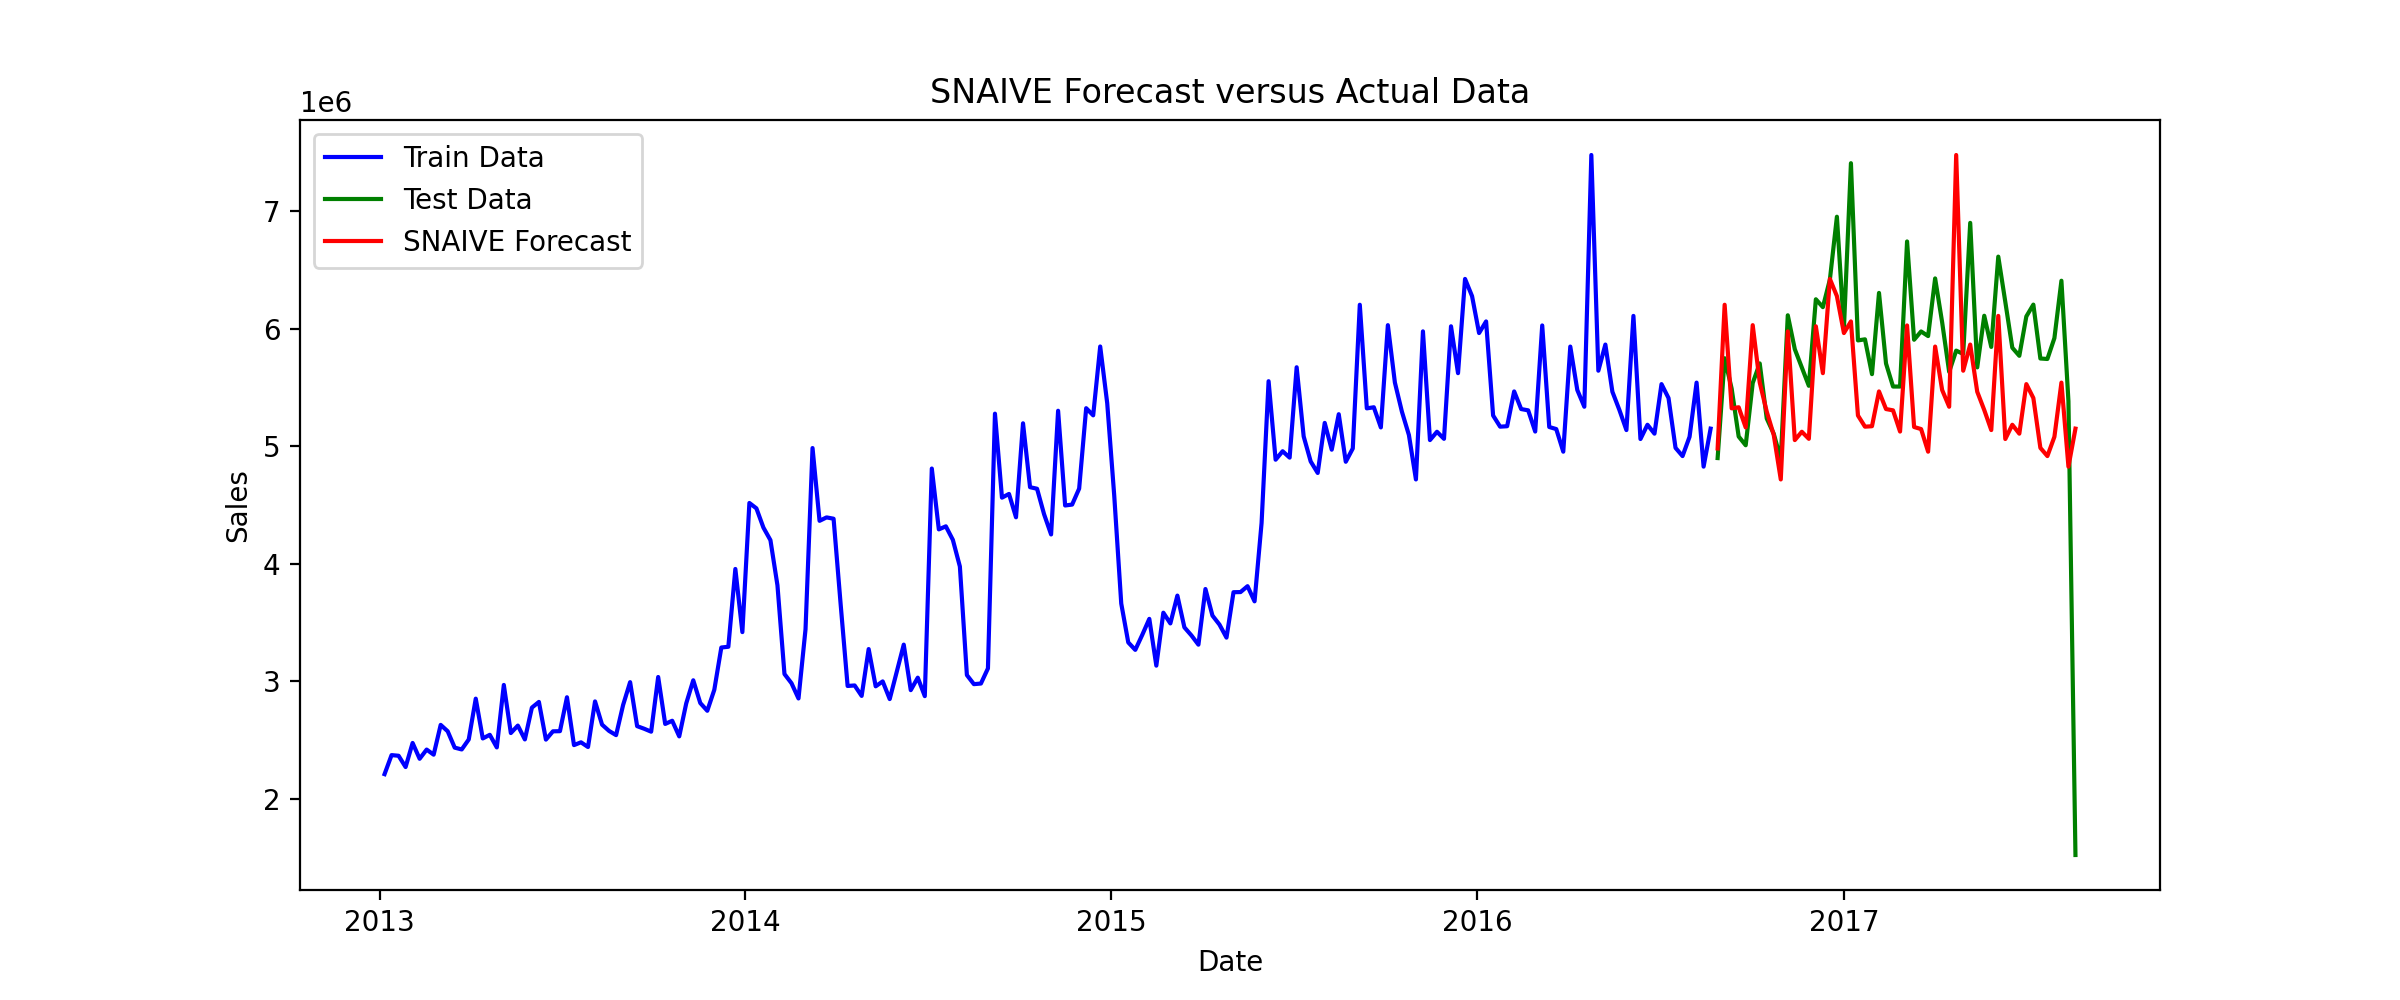

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Resampling the data to weekly frequency, summing up the sales
train_df_weekly = train_df['sales'].resample('W').sum()

# Train-test split (keeping the last year as test data in this case)
n_test = 52
train = train_df_weekly.iloc[:-n_test]
test = train_df_weekly.iloc[-n_test:]

# SNAIVE forecast
def snaive_forecast(train_series, test_series):
    forecast = train_series[-n_test:].values
    return forecast

# Generating forecast
snaive_pred = snaive_forecast(train, test)

# Calculating RMSE
rmse = sqrt(mean_squared_error(test.values, snaive_pred))
print('Test RMSE: %.3f' % rmse)

# Plotting the forecasts
plt.figure(figsize=(12, 5))
plt.plot(train.index, train.values, label='Train Data', color='blue')
plt.plot(test.index, test.values, label='Test Data', color='green')
plt.plot(test.index, snaive_pred, label='SNAIVE Forecast', color='red')
plt.legend()
plt.title('SNAIVE Forecast versus Actual Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


The SNAIVE method's RMSE on the test set was higher compared to ARIMA and LSTM, indicating that while it incorporates seasonality, it may not fully capture other underlying patterns or trends in the sales data. This model is often used as a baseline in seasonal time series forecasting due to its simplicity and the intuitive appeal of carrying forward seasonal patterns.

The Seasonal Naive forecast is straightforward and computationally inexpensive, but it is less sophisticated than models like ARIMA and LSTM. Its strength lies in its simplicity and the direct incorporation of seasonality, but it lacks the flexibility of more complex models to adapt to changes in trends or relationships over time.

# **MODEL COMPARISON**

To compare the models, we'll use the root mean square error (RMSE) as a measure of accuracy. The RMSE is a widely used measure of the differences between a model's predicted values and the observed values. The lower the RMSE, the better the model's performance.

Here are the RMSE values from all the models:

1. ARIMA: The best ARIMA model had an RMSE of 669,833.771, which indicates the model’s average prediction error over the test set.
2. Naive Forecast: The naive forecast, which uses the last observed value as the prediction for all future points, had an RMSE of 852,680.945 on the test set.
3. LSTM: The LSTM model achieved a train score RMSE of 479,514.84 and a test score RMSE of 619,110.86.
4. Seasonal Naive (SNAIVE): The SNAIVE approach had an RMSE of 817,502.034 on the test set.

Now, if we compare these RMSE values:

- **LSTM Model**: This model has the lowest RMSE on the training set and performs reasonably well on the test set too, suggesting a good fit without severe overfitting.
- **ARIMA Model**: This model has a lower RMSE on the test set compared to the LSTM model, which might suggest it's the best performing model for this specific test set.
- **Naive Forecast**: The naive model’s performance is weaker, as expected, since it doesn't account for any patterns in the data.
- **SNAIVE Forecast**: Performs better than the naive forecast but not as well as ARIMA or LSTM on the test set.

Considering these results, the **ARIMA model** is the best model based on the test RMSE among the models tested.